# MT pseudo-alignment to determine founder donors

Imports.

In [1]:
import numpy as np # data management
import pandas as pd # data management

import genotype_helpers # various helper functions & constants


This helper file uses:
Python version 3.10.11 (tags/v3.10.11:7d4cc5a, Apr  5 2023, 00:38:17) [MSC v.1929 64 bit (AMD64)],
Matplotlib version 3.7.1, 
NumPy version 1.24.3,
pandas version 1.5.3, 
pyMSAviz version 0.4.0,
scikit-allel version 1.3.6



Load unfiltered genotypes.

In [2]:
mt_modern = genotype_helpers.get_genotypes(
    genotype_helpers.SHALLOW_MODERN_FILE, 'MT', format = 'nucleotide',
    
    use_maf_filter = False, use_miss_filter = False
)

Read 117 variants across 15120 samples
Filtering out 0 variants for INFO score < 0.85
Genotypes for 15120 rats across 117 variants


In [3]:
mt_founders = genotype_helpers.get_genotypes(
    genotype_helpers.FOUNDERS_FILE, 'MT', format = 'nucleotide', 
    
    variant_subset = mt_modern.columns,
    use_maf_filter = False, use_miss_filter = False
    )

Read 122 variants across 8 samples
5 variants removed for not being in the given subset
Genotypes for 8 rats across 117 variants


Determine MT haplotypes.

In [4]:
# select all unique non-missing haplotypes
unique_mt_modern = mt_modern.dropna(axis = 0, how = 'any').drop_duplicates()

print(f'There are {unique_mt_modern.shape[0]} unique modern haplotypes')
print(f'There are {len(mt_founders.drop_duplicates().index)}' 
      ' unique founder haplotypes')

# does each sample perfectly match each haplotype?
group1 = np.logical_or(mt_modern == unique_mt_modern.iloc[0], 
                       # missing '' calls count as matching
                       pd.isna(mt_modern)).all(axis = 1)
group2 = np.logical_or(mt_modern == unique_mt_modern.iloc[1], 
                       pd.isna(mt_modern)).all(axis = 1)

print('All rats perfectly match at least one haplotype group: '
      f'{np.logical_or(group1, group2).all()}')


There are 2 unique modern haplotypes
There are 4 unique founder haplotypes
All rats perfectly match at least one haplotype group: True


Create MT pseudo-alignment. This is *Figure 2D*.

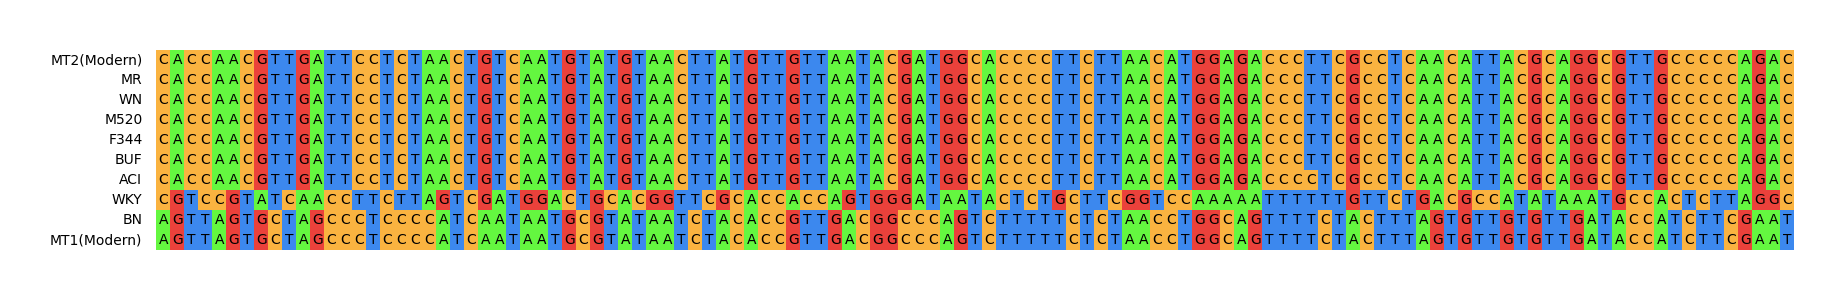

In [5]:
# add modern haplotypes to pseudo-alignment
unique_mt_modern.index = ['MT1(Modern)', 'MT2(Modern)']
mt_combined = pd.concat([mt_founders, unique_mt_modern])
# order logically
mt_combined = mt_combined.loc[['MT2(Modern)', 'MR', 'WN', 'M520', 'F344', 
                               'BUF', 'ACI', 'WKY', 'BN', 'MT1(Modern)']]

# generate a pseduo-alignment
fig = genotype_helpers.plot_align(mt_combined, basename = 'all_MT')

genotype_helpers.save_plot('all_MT_msa')